In [16]:
# ==========================================
# 各種ライブラリと CSV データの読み込み
# ==========================================
# 自動リロードを有効にする設定
%load_ext autoreload
%autoreload 2

# 必要なライブラリのインストール
%pip install pycountry
%pip install matplotlib

# ライブラリのインポート
import numpy as np  # 線形代数
import pandas as pd  # データ処理、CSVファイルのI/O（例：pd.read_csv）
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# 独自モジュールのインポート
from modules.preprocessor import Preprocessor

# CSVデータを pandas データフレームオブジェクトとして読み込み
df = pd.read_csv("../input/nlp-getting-started/train.csv")
df = df.fillna("")  # 空のカラムを空文字に置換

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# ==========================================
# EDA (探索的データ解析) 前処理前
# ==========================================

In [17]:
# ==========================================
# 前処理 > データクリーニング（Data Cleaning）
# ==========================================
# 元データをコピーして、特徴量とターゲットに分割
X_raw = df[["text", "keyword", "location"]].copy()
y = df["target"].copy()  # ターゲット変数

# "text" カラムと "location" カラムのデータクリーニング
X_processed = X_raw.copy()
X_processed["text"] = Preprocessor.normalize_text(X_raw["text"])
# X_processed["location"] = Preprocessor.normalize_location(X_raw["location"])

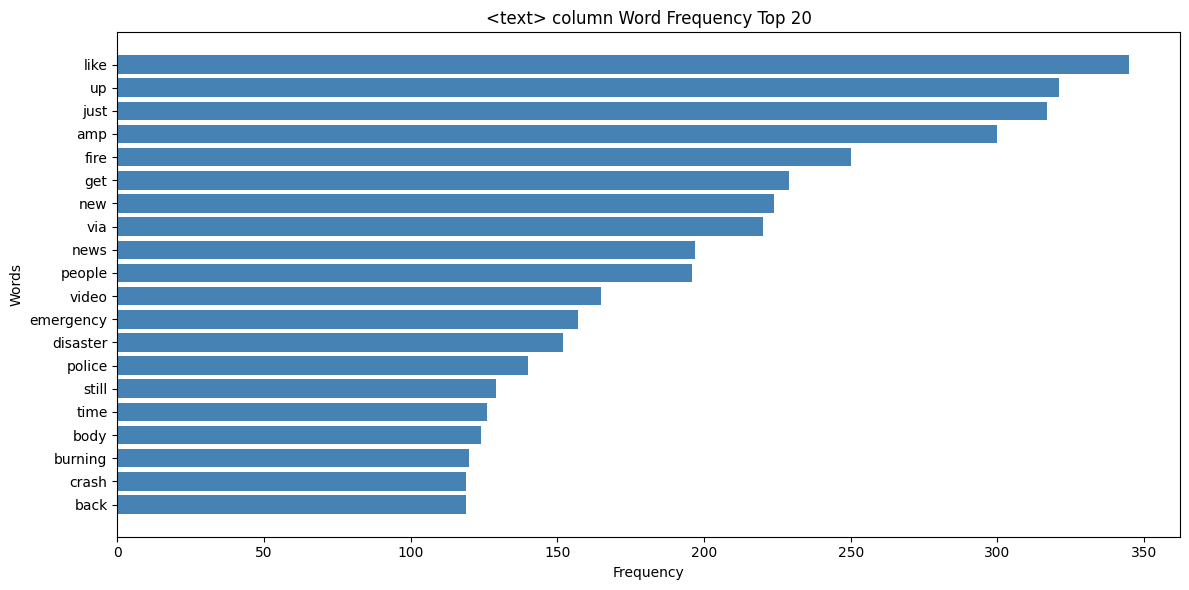

In [20]:
# ==========================================
# EDA (探索的データ解析) データクリーニング後
# ==========================================
# text カラムを単語ごとに分解、登場回数をカウントし matplotlib で表にする
import matplotlib.pyplot as plt
from collections import Counter

# すべてのテキストを結合し、空白で分割して単語リストを作成
all_words = " ".join(X_processed["text"]).split()

# 単語の出現回数をカウント
word_counts = Counter(all_words)

# 出現回数上位20件を取得
top_n = 20
most_common_words = word_counts.most_common(top_n)

# 単語と出現回数を分離
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# 棒グラフの描画
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(words[::-1], counts[::-1], color="steelblue")  # 上位が上に来るよう反転
ax.set_xlabel("Frequency")
ax.set_ylabel("Words")
ax.set_title(f"<text> column Word Frequency Top {top_n}")

# グラフのレイアウトを調整して表示
plt.tight_layout()
plt.show()